# Run A Mixed Effects Model

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to assess if a predictors relationship to the predictee is different between two groups. 

Notes:
- To best use this notebook, you should be familar with mixed effects models

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [1]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/cognition_2023/metadata/master_list_proper_subjects.xlsx'

In [2]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/retrospective_cohorts_figure/analyses'

In [3]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet='master_list_proper_subjects')
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()


,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_T_By_Origin_Group_,Z_Scored_Subiculum_Connectivity_T,Subiculum_Connectivity_T,Amnesia_Lesion_T_Map,...,Estimated_Outcome,Cognitive_Baseline,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
0,101,62.0,-0.392857,0.314066,0.314066,-21.428571,-1.282630,-1.282630,56.864683,0.447264,...,NaN,28,1.518764,-1.518764,0.72,0.28,12.222658,14.493929,-1.714513,-1.227368
1,102,77.0,-0.666667,0.013999,0.013999,-36.363636,-1.760917,-1.760917,52.970984,0.436157,...,NaN,22,0.465551,-0.465551,0.48,0.52,14.020048,15.257338,-1.155843,-1.022243
2,103,76.0,-1.447368,-0.841572,-0.841572,-78.947368,-0.595369,-0.595369,62.459631,0.497749,...,NaN,19,-0.061056,0.061056,0.36,0.64,15.118727,17.376384,-0.814348,-0.452865
3,104,65.0,-2.372549,-1.855477,-1.855477,-129.411765,-0.945206,-0.945206,59.611631,0.432617,...,NaN,17,-0.412127,0.412127,0.28,0.72,13.112424,15.287916,-1.437954,-1.014027
4,105,50.0,-0.192982,0.533109,0.533109,-10.526316,-1.151973,-1.151973,57.928350,0.193389,...,NaN,19,-0.061056,0.061056,0.36,0.64,15.086568,12.951426,-0.824344,-1.641831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,211,58.7,NaN,NaN,NaN,NaN,-0.415745,-0.189000,19.900000,NaN,...,GOOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,152,69.4,NaN,NaN,NaN,NaN,-0.701419,-0.455000,17.900000,NaN,...,DECLINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,208,79.2,NaN,NaN,NaN,NaN,-0.929958,-0.669000,16.300000,NaN,...,DECLINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,223,71.1,NaN,NaN,NaN,NaN,-0.829972,-0.575000,17.000000,NaN,...,DECLINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [4]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T',
       'Amnesia_Lesion_T_Map', 'Memory_Network_T', 'Z_Scored_Memory_Network_R',
       'Memory_Network_R', 'Subiculum_Grey_Matter', 'Subiculum_White_Matter',
       'Subiculum_CSF', 'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Age_Group', 'Age_And_Disease',
       'Age_Disease_and_Cohort', 'Subiculum_Group_By_Z_Score_Sign',
       'Subiculum_Group_By_Infl

In [5]:
drop_list = ['Age', 'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_']

In [6]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_T_By_Origin_Group_,Z_Scored_Subiculum_Connectivity_T,Subiculum_Connectivity_T,Amnesia_Lesion_T_Map,...,Estimated_Outcome,Cognitive_Baseline,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
0,101,62.0,-0.392857,0.314066,0.314066,-21.428571,-1.282630,-1.282630,56.864683,0.447264,...,NaN,28,1.518764,-1.518764,0.72,0.28,12.222658,14.493929,-1.714513,-1.227368
1,102,77.0,-0.666667,0.013999,0.013999,-36.363636,-1.760917,-1.760917,52.970984,0.436157,...,NaN,22,0.465551,-0.465551,0.48,0.52,14.020048,15.257338,-1.155843,-1.022243
2,103,76.0,-1.447368,-0.841572,-0.841572,-78.947368,-0.595369,-0.595369,62.459631,0.497749,...,NaN,19,-0.061056,0.061056,0.36,0.64,15.118727,17.376384,-0.814348,-0.452865
3,104,65.0,-2.372549,-1.855477,-1.855477,-129.411765,-0.945206,-0.945206,59.611631,0.432617,...,NaN,17,-0.412127,0.412127,0.28,0.72,13.112424,15.287916,-1.437954,-1.014027
4,105,50.0,-0.192982,0.533109,0.533109,-10.526316,-1.151973,-1.151973,57.928350,0.193389,...,NaN,19,-0.061056,0.061056,0.36,0.64,15.086568,12.951426,-0.824344,-1.641831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,86,57.0,NaN,0.598787,-0.099428,0.000000,-0.087220,-0.621000,22.200000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,87,65.0,NaN,0.598787,-0.099428,0.000000,0.598397,0.173000,27.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,88,65.0,NaN,5.854050,2.637141,15.384615,0.269872,-0.207000,24.700000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,89,67.0,NaN,0.598787,-0.099428,0.000000,-0.158639,-0.694000,21.700000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [7]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T',
       'Amnesia_Lesion_T_Map', 'Memory_Network_T', 'Z_Scored_Memory_Network_R',
       'Memory_Network_R', 'Subiculum_Grey_Matter', 'Subiculum_White_Matter',
       'Subiculum_CSF', 'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Age_Group', 'Age_And_Disease',
       'Age_Disease_and_Cohort', 'Subiculum_Group_By_Z_Score_Sign',
       'Subiculum_Group_By_Infl

Set the parameters for dropping rows

In [8]:
column = 'City'  # The column you'd like to evaluate
condition = 'not'  # The condition to check ('equal', 'above', 'below')
value = 'Wurzburg'  # The value to compare against

In [9]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
data_df

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_T_By_Origin_Group_,Z_Scored_Subiculum_Connectivity_T,Subiculum_Connectivity_T,Amnesia_Lesion_T_Map,...,Estimated_Outcome,Cognitive_Baseline,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
46,1,57.0,-2.609929,-1.372562,-1.372562,-5.673759,1.080695,1.080695,30.376565,-0.113151,...,NaN,141,-0.115295,-0.115295,0.625,0.625,22.020300,20.467840,1.056258,0.508516
47,2,50.0,0.992806,1.331414,1.331414,2.158273,-0.930548,-0.930548,16.295870,-0.502484,...,NaN,139,-0.935174,-0.935174,0.375,0.375,11.487188,4.942970,-0.759238,-1.629565
48,3,62.0,-0.638889,0.106772,0.106772,-1.388889,1.155469,1.155469,30.900051,-0.398033,...,NaN,144,1.114522,1.114522,1.000,1.000,23.013479,22.145924,1.227443,0.739621
49,4,50.0,-0.985714,-0.153533,-0.153533,-2.142857,-0.228971,-0.228971,21.207602,-0.426115,...,NaN,140,-0.525235,-0.525235,0.500,0.500,12.198485,18.933435,-0.636638,0.297198
50,6,60.0,-0.323944,0.343149,0.343149,-0.704225,0.109572,0.109572,23.577739,-0.454075,...,NaN,142,0.294644,0.294644,0.750,0.750,17.634088,18.128314,0.300247,0.186317
51,7,73.0,-0.326241,0.341424,0.341424,-0.709220,1.977842,1.977842,36.657479,-0.177886,...,NaN,141,-0.115295,-0.115295,0.625,0.625,24.162033,27.503198,1.425409,1.477423
52,9,64.0,-0.985714,-0.153533,-0.153533,-2.142857,-0.407778,-0.407778,19.955774,-0.494405,...,NaN,140,-0.525235,-0.525235,0.500,0.500,10.782803,14.964053,-0.880646,-0.249464
53,11,62.0,-0.319444,0.346526,0.346526,-0.694444,-1.093332,-1.093332,15.156220,-0.507962,...,NaN,144,1.114522,1.114522,1.000,1.000,9.653427,12.002916,-1.075306,-0.657271
54,12,54.0,0.000000,0.586280,0.586280,0.000000,0.788134,0.788134,28.328345,-0.220427,...,NaN,136,-2.164991,-2.164991,0.000,0.000,21.521001,21.243697,0.970198,0.615367
55,14,49.0,0.321678,0.827710,0.827710,0.699301,-0.455880,-0.455880,19.619016,-0.440579,...,NaN,143,0.704583,0.704583,0.875,0.875,10.881447,15.224677,-0.863644,-0.213571


**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [10]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['Age']

In [11]:
# data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_Connectivity,Subiculum_Connectivity,Amnesia_Lesion_T_Map,Memory_Network_T,Z_Scored_Memory_Network_R,...,Standardized_Subiculum_Total,Disease,Cohort,City,Inclusion_Cohort,Age_Group,Age_And_Disease,Subiculum_Group,Age_Disease_and_Cohort,Subiculum_Group_By_Inflection
0,101,62.0,-0.392857,0.314066,-21.428571,-1.282630,56.864683,0.447264,0.494596,-1.895022,...,1.789087,Alzheimer,1,Toronto,1,young,Alzheimer_young,low,Alzheimer_young_Toronto,Low
1,102,77.0,-0.666667,0.013999,-36.363636,-1.760917,52.970984,0.436157,0.502192,-1.909919,...,-1.093456,Alzheimer,1,Toronto,1,old,Alzheimer_old,low,Alzheimer_old_Toronto,Low
2,103,76.0,-1.447368,-0.841572,-78.947368,-0.595369,62.459631,0.497749,0.581148,-0.803738,...,0.143505,Alzheimer,1,Toronto,1,old,Alzheimer_old,low,Alzheimer_old_Toronto,Low
3,104,65.0,-2.372549,-1.855477,-129.411765,-0.945206,59.611631,0.432617,0.520518,-1.401520,...,0.126248,Alzheimer,1,Toronto,1,old,Alzheimer_old,low,Alzheimer_old_Toronto,Low
4,105,50.0,-0.192982,0.533109,-10.526316,-1.151973,57.928350,0.193389,0.491742,-1.401705,...,0.144737,Alzheimer,1,Toronto,1,young,Alzheimer_young,low,Alzheimer_young_Toronto,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,42,63.0,0.000000,0.000000,NaN,-0.574000,NaN,NaN,NaN,NaN,...,NaN,Parkinson,9,Boston,7,young,Parkinson_young,low,Parkinson_young_Boston,Low
96,45,60.0,0.000000,0.000000,NaN,0.190000,NaN,NaN,NaN,NaN,...,NaN,Parkinson,12,Boston,10,young,Parkinson_young,high,Parkinson_young_Boston,High
98,48,73.0,-0.500000,0.500000,NaN,0.390000,NaN,NaN,NaN,NaN,...,NaN,Parkinson,14,Boston,12,young,Parkinson_young,high,Parkinson_young_Boston,High
99,49,68.0,0.000000,0.000000,NaN,-0.756000,NaN,NaN,NaN,NaN,...,NaN,Parkinson,15,Boston,13,young,Parkinson_young,low,Parkinson_young_Boston,Low


Descriptive Stats

In [12]:
data_df.describe()

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_Connectivity,Subiculum_Connectivity,Amnesia_Lesion_T_Map,Memory_Network_T,Z_Scored_Memory_Network_R,...,Subiculum_Total,Standardized_Age,Standardized_Percent_Improvement,Standardized_Subiculum_Connectivity,Standardized_Subiculum_Grey_Matter,Standardized_Subiculum_White_Matter,Standardized_Subiculum_CSF,Standardized_Subiculum_Total,Cohort,Inclusion_Cohort
count,82.000000,82.000000,82.000000,82.000000,72.000000,82.000000,72.000000,72.000000,72.000000,72.000000,...,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,82.000000,82.000000
mean,81.487805,63.743902,-0.587478,0.041711,-24.173205,0.051460,51.346147,0.153713,0.396094,0.018028,...,0.663074,-0.023211,-0.023211,0.035987,0.032359,-0.030977,-0.030128,0.037356,2.426829,1.865854
std,52.303304,8.788054,0.999348,0.917012,43.251602,0.980973,22.727710,0.420577,0.322126,0.997213,...,2.184669,1.017104,1.017104,0.972990,1.015150,0.988083,1.021720,0.982599,3.413953,2.938725
min,1.000000,46.000000,-4.535211,-3.428250,-207.692308,-2.576474,15.050219,-0.659502,-0.363412,-2.427112,...,-2.144075,-3.523461,-3.523461,-2.412986,-3.303201,-1.732774,-3.303201,-1.685742,1.000000,1.000000
25%,29.250000,58.000000,-0.960550,-0.170116,-37.740385,-0.655969,27.750366,-0.321842,0.070122,-0.570234,...,-0.829154,-0.361983,-0.361983,-0.674219,-0.644489,-0.728695,-0.579606,-0.683601,1.000000,1.000000
50%,105.500000,64.000000,-0.387401,0.106772,-5.217832,0.012710,60.995631,0.434387,0.556495,0.038842,...,-0.035137,0.117964,0.117964,0.002146,0.182301,-0.079546,-0.235042,0.055132,1.000000,1.000000
75%,127.750000,72.000000,0.000000,0.586280,0.000000,0.734739,69.813800,0.496529,0.652797,0.711785,...,1.445829,0.618322,0.618322,0.723344,0.624959,0.514574,0.627145,0.494347,2.000000,1.000000
max,150.000000,79.000000,1.000000,1.840498,54.545455,2.357590,85.082502,0.569043,0.714419,2.442475,...,8.959061,1.844523,1.844523,2.297968,3.222209,2.909124,2.644521,2.775495,21.000000,19.000000


# 01 - Model Data

In [ ]:
formula = 

In [ ]:
results = 

# 02 - Identification of a Saddle Point


# Partial Derivative Explanation for the Equation $ y = B_1x + B_2z + B_3xz $

When taking the partial derivative of the equation $ y = B_1x + B_2z + B_3xz $ with respect to $ x $, the logic is as follows:

- Treat $ z $ as a constant since we are differentiating with respect to $ x $. 
- Derivatives of constants are zero. Derivatives of first-order polynomials ($ x $) are one. 
- All terms with $ z $ are treated as constants.
    - This means both $ B_2z $ and $ B_3z $ are considered constants.
    - When differentiated with respect to $ x $:
        - $ B_2z $ does not have $ x $. Thus its derivative is zero.
        - $ B_3z $ has an $ x $ term in $ B_3zx $, thus its derivative is the constant $ B_3z $. 
            - This is due to the special situation of the product rule wherein the derivative of a constant and a differentiable variable is = constant * derivative of differentiable variable.

Hence, the partial derivative of $ y $ with respect to $ x $ is given by:

$$ {\partial y}/{\partial x} = {\partial y}/{\partial x}(B_1x) + {\partial y}/{\partial x}(B_2z) + {\partial y}/{\partial x}(B_3xz) $$

The product rule is applied to the interaction term, which expanding provides:

$$ {\partial y}/{\partial x} = {\partial y}/{\partial x}(B_1x) + {\partial y}/{\partial x}(B_2z) + {\partial y}/{\partial x}(B_3x) * {\partial y}/{\partial x}(B_3z) $$

Which applying the product rule, is equivalent to:

$$ {\partial y}/{\partial x} = {\partial y}/{\partial x}(B_1x) + {\partial y}/{\partial x}(B_2z) + 1 * {\partial y}/{\partial x}(B_3z) $$

The derivative of a constant (z) is equivalent to zero. Thus, simplifying this, we get:

$$ {\partial y}{\partial x} = B_1 + 0 + B_3z $$

Therefore, the resulting equation for the partial derivative is:

$$ {\partial y}{\partial x} = B_1 + B_3z $$

This equation represents the rate of change of $ y $ with respect to $ x $, while holding $ z $ constant.


Get coefficients

In [10]:
results.coefficients

NameError: name 'results' is not defined

# Split & Visualize Data By Saddle Point

This code is designed to create an interaction plot to visualize the effects of two factors and their interaction on the outcome variable.

The interaction_plot function takes as input a dataframe, two factors (x_one and x_two), two corresponding labels for the conditions when the values of these factors are under the mean (x_one_under_mean and x_two_under_mean) and over the mean (x_one_over_mean and x_two_over_mean), and the response variable (outcome). If binarize is set to True, it converts the two factors into binary variables based on whether their values are above or below the mean. The function then creates a mapping for the x_two variable to numerical values for the purpose of plotting.

It uses the interaction_plot function from the statsmodels package to create the plot. In the plot, x_two is represented on the x-axis, x_one is used to color the lines, and the outcome variable is plotted on the y-axis. The function also sets the labels for the x and y axes and the tick labels on the x-axis according to the inputs provided.

The function also allows for saving the plot to an output directory specified by the user. If save is set to True, it saves the plot in both PNG and SVG formats.

saved to: /Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/final/supplementary_parkinson/2D_interaction_figure.png


/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Work/Software/Research/nimlab/calvin_utils/calvin_utils/statistical_utils/calculus_utils.py:82: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax.errorbar(x_vals, y_vals, yerr=y_errs, color=color, fmt='-o', capsize=5, capthick=2, elinewidth=2, label=group, linestyle='-')


<module 'matplotlib.pyplot' from '/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/matplotlib/pyplot.py'>

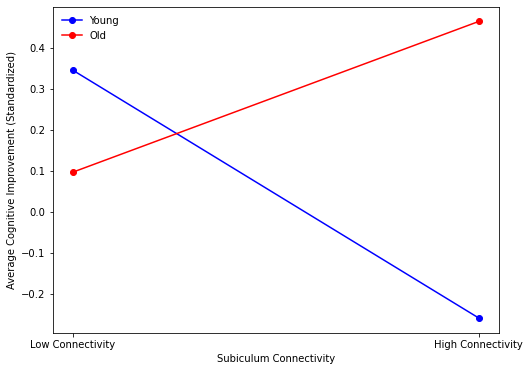

In [10]:
from calvin_utils.statistical_utils.calculus_utils import saddle_binarization
# Running the function to display the interaction plot
save = False
#----------------------------------------------------------------
interaction_figure = saddle_binarization(data_df.copy(), 
                 x_one='Age', x_one_under_mean='Young', x_one_over_mean='Old', x_one_split_point=65,
                 x_two='Z_Scored_Subiculum_Connectivity', x_two_under_mean='Low Connectivity', x_two_over_mean='High Connectivity', x_two_split_point=-0.1,
                 response='Z_Scored_Percent_Cognitive_Improvement', 
                 x_label='Subiculum Connectivity', 
                 y_label='Average Cognitive Improvement (Standardized)',
                 plot_error_bars=False,
                 save=True, out_dir=out_dir)

interaction_figure